In [ ]:
import pandas as pd # used for data manipulations
import matplotlib.pyplot as plt    # used for plotting
from sklearn import datasets
import numpy as np     # used for numerical calculations

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split


#import the decisiontree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

# for pre-processing
from sklearn import preprocessing

In [ ]:
#import the datasets

Drugs = pd.read_csv("/content/drug200.csv")

In [ ]:
Drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
Drugs.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
Drugs.isnull().sum() # Checking for null values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
Drugs['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
# use label encoder to convert required columns into numbers

label_encoder = preprocessing.LabelEncoder()
Drugs['Drug'] = label_encoder.fit_transform(Drugs['Drug'])
Drugs['Sex'] = label_encoder.fit_transform(Drugs['Sex'])
Drugs['BP'] = label_encoder.fit_transform(Drugs['BP'])
Drugs['Cholesterol'] = label_encoder.fit_transform(Drugs['Cholesterol'])

In [ ]:
Drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [ ]:
x = Drugs.iloc[:,:-1]
y = Drugs.iloc[:,-1]

In [ ]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [ ]:
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64

In [ ]:
# Splitting the dataset into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 5), (40, 5), (160,), (40,))

In [ ]:
## Building Decision Tree Classifier using Entropy as a Criterion#

In [ ]:
model =  DecisionTreeClassifier(criterion='entropy',max_depth =4)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
##PLot the decsion Tree#

[Text(0.625, 0.9, 'x[4] <= 14.829\nentropy = 1.923\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.762\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\nentropy = 0.987\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nentropy = 0.729\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\nentropy = 0.999\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]')]

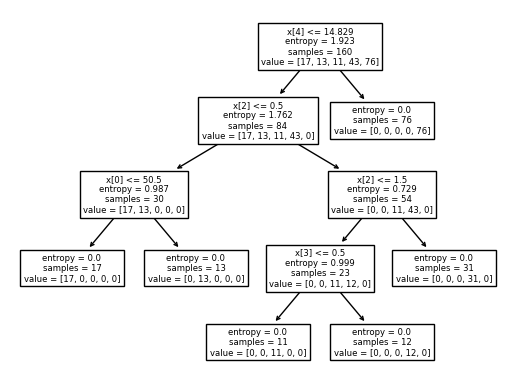

In [ ]:
tree.plot_tree(model)

In [ ]:
##Prediction on the Test data##

In [ ]:
preds = model.predict(x_test)

In [ ]:
pd.Series(preds).value_counts()

4    15
3    11
0     6
2     5
1     3
dtype: int64

In [ ]:
y_test

95     3
15     4
30     3
158    2
128    4
115    4
69     4
170    3
174    0
45     3
66     0
182    3
165    4
78     0
186    1
177    4
56     1
152    3
82     2
68     4
124    1
16     3
148    3
93     4
65     4
60     4
84     2
67     3
125    4
132    3
9      4
18     2
55     2
75     4
150    0
104    4
135    3
137    0
164    4
76     0
Name: Drug, dtype: int64

In [ ]:
#Crosstab : Way to understand the two way table between predicted vs actual#

In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3,4
Drug,,,,,
0,6,0,0,0,0
1,0,3,0,0,0
2,0,0,5,0,0
3,0,0,0,11,0
4,0,0,0,0,15


In [ ]:
#Accuracy of the above model#

In [ ]:
np.mean(preds==y_test)

1.0